In [7]:
pip install -r requirements.txt

  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached certifi-2023.7.22-py3-none-any.whl (158 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached configparser-3.8.1-py2.py3-none-any.whl (22 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached future-0.18.3.tar.gz (840 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_auth-2.15.0-py2.py3-none-any.whl (177 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached googleapis_common_protos-1.56.4-py2.py3-none-any.whl (211 kB)
  Using cached grpcio-1.54.3-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached h5py-3.11.0-cp311-cp311-win

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  DEPRECATION: MarkupSafe is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Consider adding this directory to PATH or, if you prefer to suppress

In [10]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
from keras.utils import load_img, img_to_array
import pickle

# ======================================
# PATHS
# ======================================
BASE_DIR = "."
TRAIN_DIR = f"{BASE_DIR}/dataset/imgs/train"
TEST_DIR  = f"{BASE_DIR}/dataset/imgs/test"
CSV_DIR   = f"{BASE_DIR}/csv_files"
PICKLE_DIR = f"{BASE_DIR}/pickle_files"
NPY_DIR = f"{BASE_DIR}/npy_files"

os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(PICKLE_DIR, exist_ok=True)
os.makedirs(NPY_DIR, exist_ok=True)

# ======================================
# CREATE CSV
# ======================================
def create_csv(DATA_DIR, filename):
    data = []
    items = os.listdir(DATA_DIR)

    # Check folder-type dataset
    if os.path.isdir(os.path.join(DATA_DIR, items[0])):
        for cls in items:
            cdir = os.path.join(DATA_DIR, cls)
            if not os.path.isdir(cdir): continue
            for file in os.listdir(cdir):
                data.append({"Filename": os.path.join(cdir, file), "ClassName": cls})
    else:
        for file in items:
            data.append({"Filename": os.path.join(DATA_DIR, file), "ClassName": "test"})

    pd.DataFrame(data).to_csv(f"{CSV_DIR}/{filename}", index=False)

# Make CSVs
create_csv(TRAIN_DIR, "train.csv")
create_csv(TEST_DIR, "test.csv")

# ======================================
# LOAD & ENCODE LABELS
# ======================================
train_df = pd.read_csv(f"{CSV_DIR}/train.csv")
labels_list = sorted(list(train_df["ClassName"].unique()))
labels_map = {label: idx for idx, label in enumerate(labels_list)}

train_df["ClassName"] = train_df["ClassName"].map(labels_map)

# Save labels map
with open(f"{PICKLE_DIR}/labels_map.pkl", "wb") as f:
    pickle.dump(labels_map, f)

# ======================================
# CONVERT IMAGES → TENSORS
# ======================================
def paths_to_tensor(paths):
    tensors = []
    for p in tqdm(paths):
        try:
            img = load_img(p, target_size=(128, 128))
            arr = img_to_array(img)
            tensors.append(arr)
        except:
            pass
    return np.array(tensors)

# Convert
X = paths_to_tensor(train_df["Filename"].values) / 255.0
y = train_df["ClassName"].values

# Save numpy arrays
np.save(f"{NPY_DIR}/X.npy", X)
np.save(f"{NPY_DIR}/y.npy", y)

print("✅ Preprocessing Complete!")
print("Saved:")
print(f"- {NPY_DIR}/X.npy")
print(f"- {NPY_DIR}/y.npy")
print(f"- {PICKLE_DIR}/labels_map.pkl")

100%|██████████| 22424/22424 [00:29<00:00, 755.16it/s]


✅ Preprocessing Complete!
Saved:
- ./npy_files/X.npy
- ./npy_files/y.npy
- ./pickle_files/labels_map.pkl


In [12]:
pip install -r requirements.txt

     ---------------------------------------- 10.6/10.6 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 7.7/7.7 MB 3.8 MB/s eta 0:00:00
     -------------------------------------- 294.9/294.9 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 38.7/38.7 MB 8.2 MB/s eta 0:00:00
     -------------------------------------- 308.4/308.4 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 225.2/225.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 5.2 MB/s eta 0:00:00
     ---------------------------------------- 73.8/73.8 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 113.9/113.9 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.3675 - loss: 1.7620
Epoch 1: val_accuracy improved from -inf to 0.93289, saving model to ./model/self_trained/best_model.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 105s 232ms/step - accuracy: 0.3681 - loss: 1.7606 - val_accuracy: 0.9329 - val_loss: 0.2519
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.9158 - loss: 0.2833
Epoch 2: val_accuracy improved from 0.93289 to 0.95764, saving model to ./model/self_trained/best_model.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.9159 - loss: 0.2832 - val_accuracy: 0.9576 - val_loss: 0.1502
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9613 - loss: 0.1293
Epoch 3: val_accuracy improved from 0.95764 to 0.98841, saving model to ./model/self_trained/best_model.keras
449/449 ━━━━━━━━━━━━━━━━━━━━ 112s 248ms/step - accuracy: 0.9614 - loss: 0.1293 - val_accuracy: 0.9884 - val_loss: 0.0486
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 177

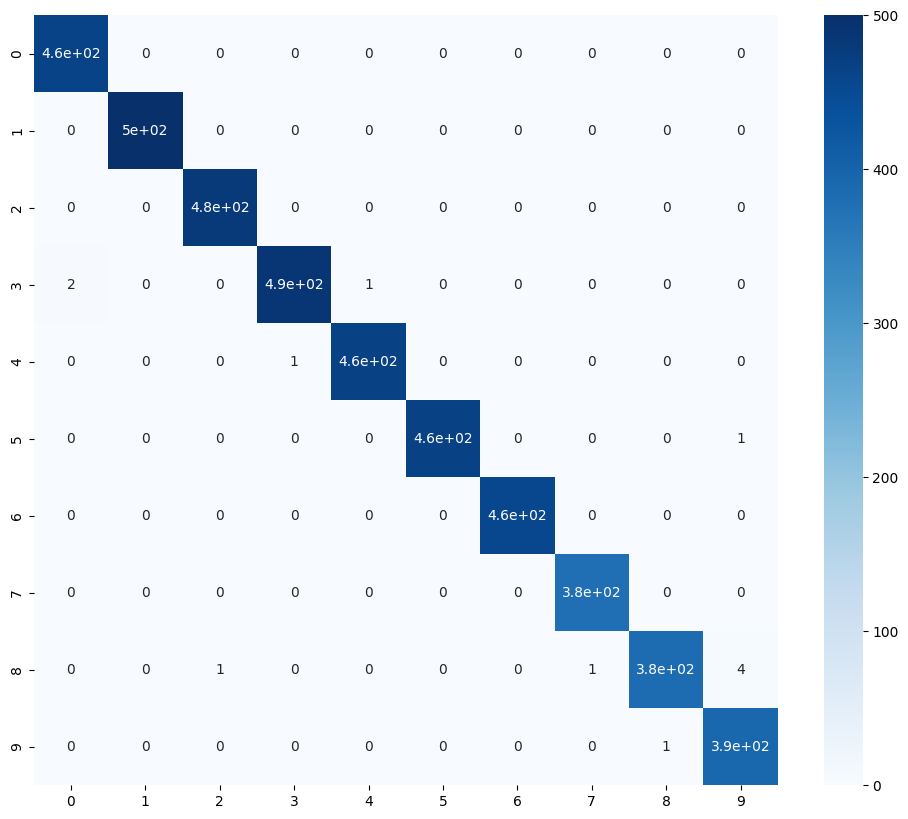

Accuracy: 0.9973244147157191


In [13]:
import os
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# ======================================
# PATHS
# ======================================
BASE_DIR = "."
NPY_DIR = f"{BASE_DIR}/npy_files"
MODEL_DIR = f"{BASE_DIR}/model/self_trained"
PICKLE_DIR = f"{BASE_DIR}/pickle_files"

os.makedirs(MODEL_DIR, exist_ok=True)

# GPU
if tf.config.list_physical_devices('GPU'):
    keras.mixed_precision.set_global_policy('mixed_float16')

# ======================================
# LOAD PREPROCESSED DATA
# ======================================
X = np.load(f"{NPY_DIR}/X.npy")
y = np.load(f"{NPY_DIR}/y.npy")

with open(f"{PICKLE_DIR}/labels_map.pkl", "rb") as f:
    labels_map = pickle.load(f)

labels_list = list(labels_map.keys())
y_cat = to_categorical(y)

# train split
Xtrain, Xval, ytrain, yval = train_test_split(X, y_cat, test_size=0.2, random_state=42)

# ======================================
# MODEL
# ======================================
model = Sequential([
    Input(shape=(128, 128, 3)),

    Conv2D(64, 2, padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(128, 2, padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(256, 2, padding='same', activation='relu'),
    MaxPooling2D(2),

    Conv2D(512, 2, padding='same', activation='relu'),
    MaxPooling2D(2),

    Dropout(0.5),
    Flatten(),

    Dense(500, activation='relu'),
    Dropout(0.5),

    Dense(len(labels_list), activation='softmax', dtype='float32')
])

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

checkpoint = ModelCheckpoint(
    f"{MODEL_DIR}/best_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# ======================================
# TRAIN
# ======================================
history = model.fit(
    Xtrain, ytrain,
    validation_data=(Xval, yval),
    epochs=25,
    batch_size=40,
    callbacks=[checkpoint]
)

# ======================================
# CONFUSION MATRIX
# ======================================
ypred = np.argmax(model.predict(Xval), axis=1)
ytrue = np.argmax(yval, axis=1)

cm = confusion_matrix(ytrue, ypred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()

print("Accuracy:", accuracy_score(ytrue, ypred))

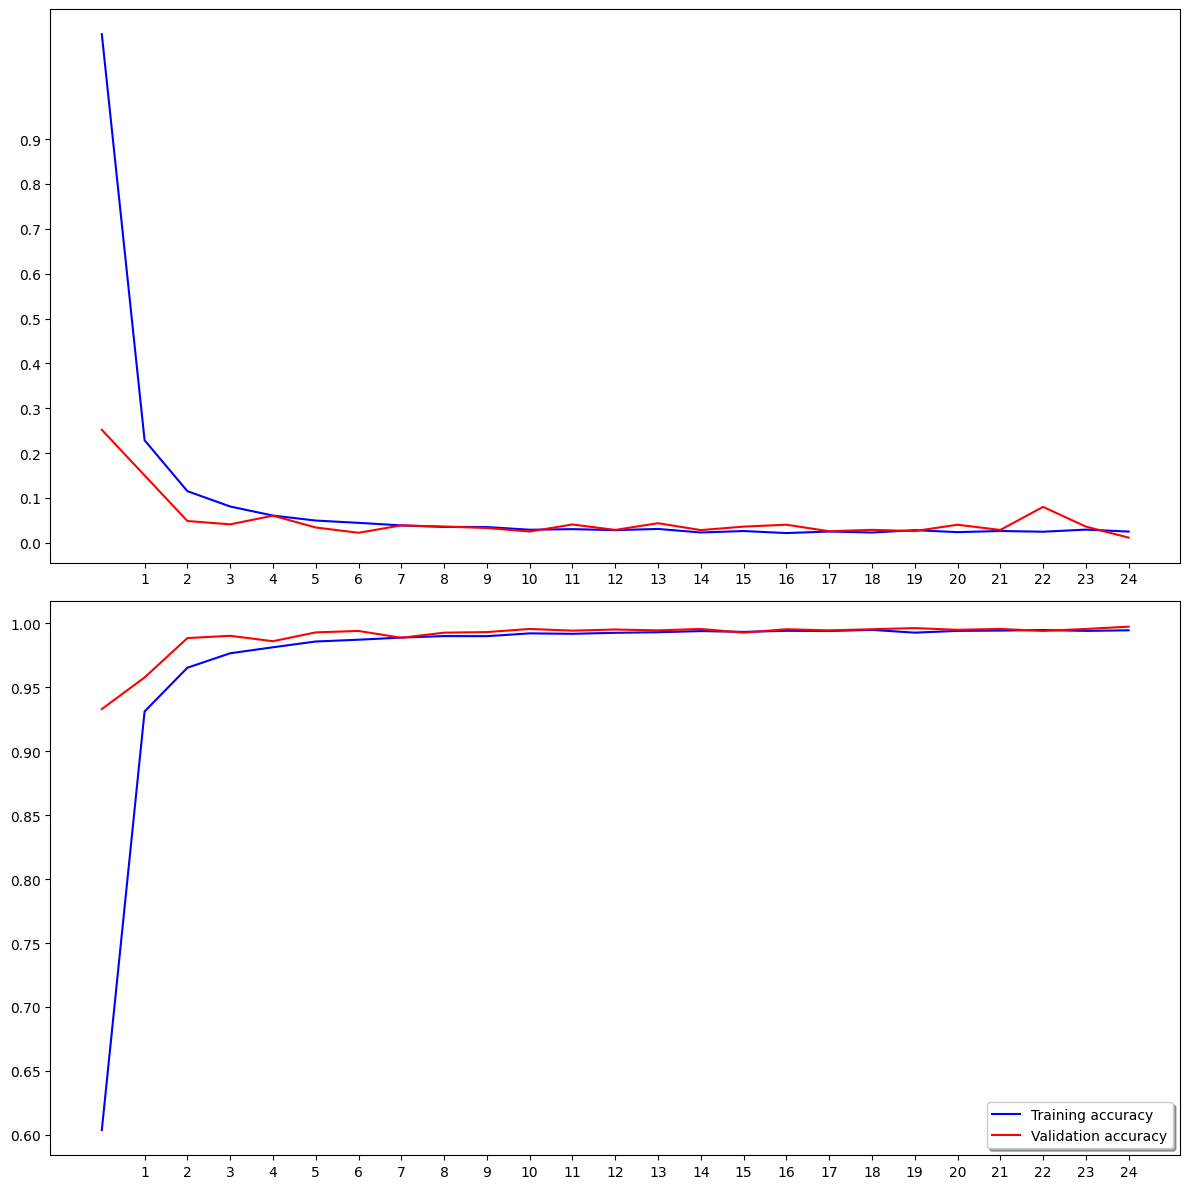

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 25, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 25, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(os.path.join(MODEL_DIR,"confusion_matrix.png"))
    return fig

In [17]:
def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels #sess.run(tf.argmax(n_labels, 1))
    predictions = n_predictions #sess.run(tf.argmax(n_predictions, 1))

#     confusion_matrix = sess.run(tf.contrib.metrics.confusion_matrix(labels, predictions))
    matrix = confusion_matrix(labels.argmax(axis=1),predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]

    c = c_m.astype(dtype = np.uint8)

    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

In [19]:
# Correct class names (in label order)
class_names = [label for label, idx in sorted(labels_map.items(), key=lambda x: x[1])]

# VALIDATION TENSORS ARE ALREADY PREPROCESSED (Xval)
valid_tensors = Xval   # DO NOT re-process

# Predict
ypred = model.predict(valid_tensors)


141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


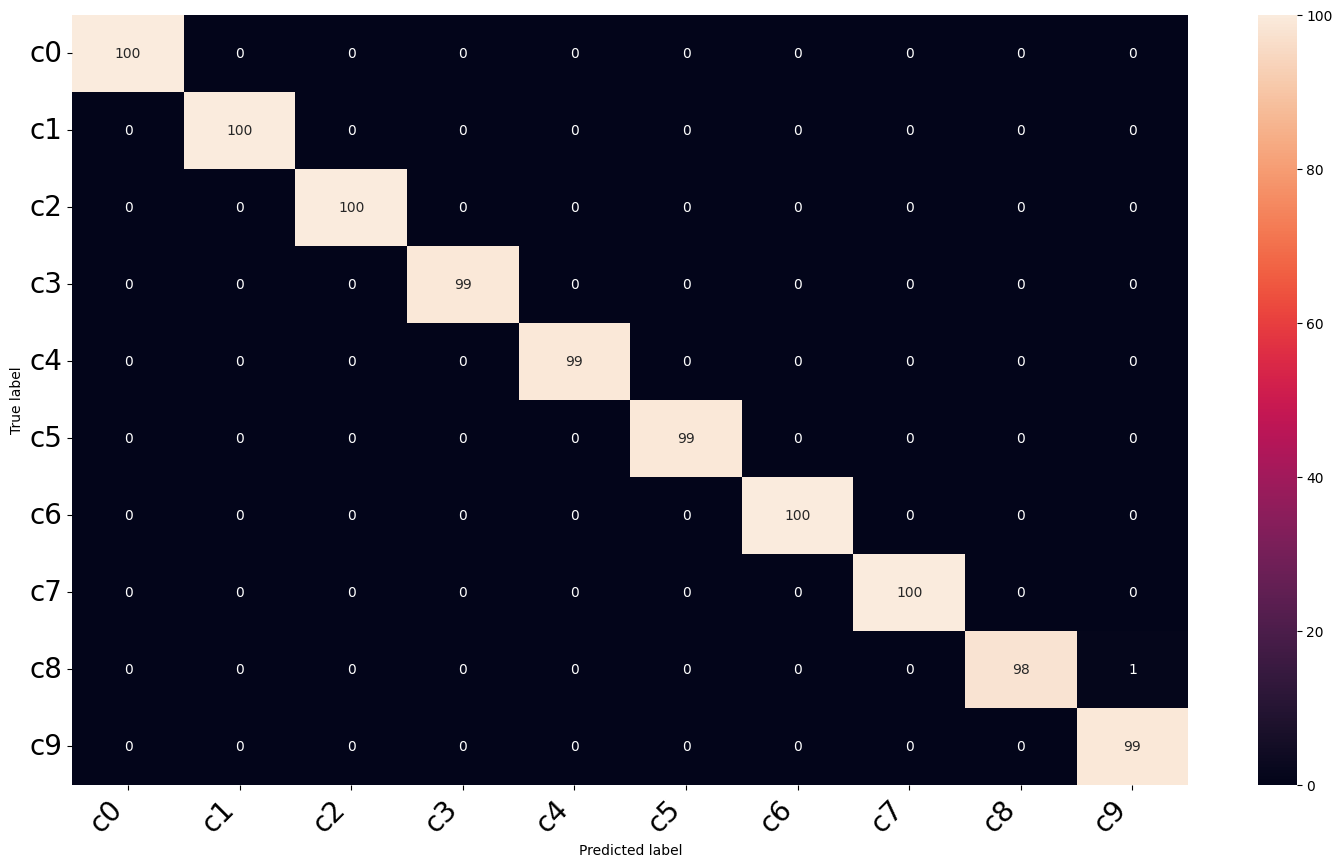

In [21]:
print_heatmap(yval,ypred,class_names)

In [22]:
ypred_class = np.argmax(ypred,axis=1)
# print(ypred_class[:10])
ytest = np.argmax(yval,axis=1)

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score
accuracy = accuracy_score(ytest,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(ytest, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(ytest,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(ytest,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.997324
Precision: 0.997335
Recall: 0.997324
F1 score: 0.997322
